## Leer datos con Numpy


En este colab leeremos datos con numpy para que despues podamos manipularlos con PyTorch.

Los datos que leeremos serán los que correspondiente a la Tarea1, por lo que lo primero que haremos será clonar el Github.

In [1]:
## Clonamos el github
!git clone https://github.com/jorgeperezrojas/cc6204-DeepLearning-DCCUChile.git

fatal: destination path 'cc6204-DeepLearning-DCCUChile' already exists and is not an empty directory.


In [2]:
## Vemos los directorios disponibles 
!ls

cc6204-DeepLearning-DCCUChile  datalab


In [3]:
## Cambiamos de directorio a donde se encuentran los datos de la tarea1.

import os
os.chdir("./cc6204-DeepLearning-DCCUChile/2018/tareas/tarea1/recursos/varita_magica/data")
!ls

test_set  train_set


In [0]:
## Instalamos PyTorch

from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
## Importamos las librerias de PyTorch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
from torchvision import transforms, utils

In [7]:
from scipy import misc
import glob

## Leemos una imagen aleatoria para explorarla
image0 = misc.imread("./train_set/hechizo-8/057.png")
image0.shape

(64, 64, 2)

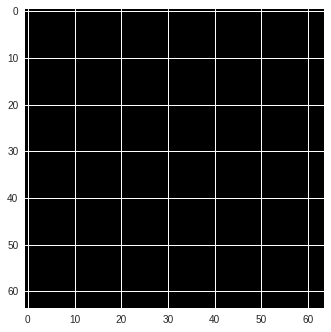

In [8]:
import matplotlib.pyplot as plt

## Dado que tiene 2 canales, plotearemos cada uno por separado

## Imagen del canal 0
plt.imshow(image0[:, :, 0], cmap=plt.cm.gray)

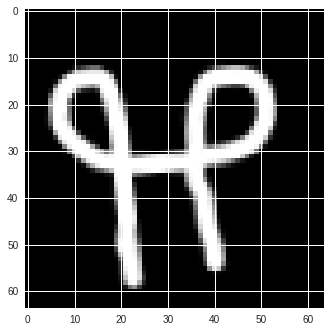

In [9]:
## Imagen del canal 1
plt.imshow(image0[:, :, 1], cmap=plt.cm.gray)

In [0]:
## Cargar todas las imagenes del train_set como numpy array
images = []

## Esto es solo con fines pedagógicos, deberíamos tambien retener la información de la etiqueta que se encuentra en cada carpeta.
for image_path in glob.glob("./train_set/hechizo-*/*.png"):
    ## Explorando las imagenes nos dimos cuenta que solo el segundo canal contiene información relevante, por lo que no cargamos el primero
    images.append(misc.imread(image_path)[:,:,1])

In [11]:
## Nuevamente leemos una imagen aleatoria
imagetest = images[1535]
imagetest.shape

(64, 64)

In [14]:
## Creamos un tensor a partir de un Numpy array
tensor_imagetest = torch.from_numpy(imagetest)
tensor_imagetest.shape

torch.Size([64, 64])

In [0]:
import random

## Función para desorderar los datos leidos (esto lo pueden hacer directamente con PyTorch mediante DataLoader)
def my_shuffle(array):
    random.shuffle(array)
    return array

In [0]:
## Desordenamos nuestro Train_set
shuffle_train_set = my_shuffle(images)

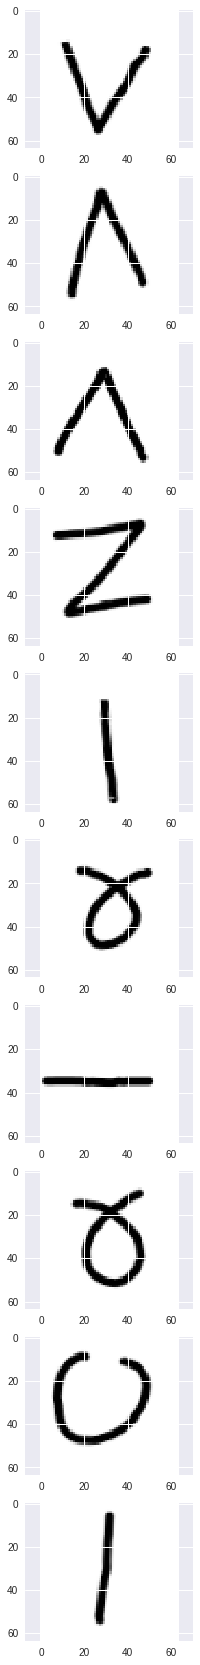

In [18]:
## Elegimos un numero de ejemplos y los visualizamos

from matplotlib.pyplot import imshow, figure, subplots

n_ejemplos = 10
fig, axs = subplots(nrows=n_ejemplos, sharey=True, figsize=(3,n_ejemplos*3))

for i in range(n_ejemplos):
  axs[i].imshow(shuffle_train_set[i])